In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [363]:
# Load the data
tweets_df = pd.read_csv('../Data Collection/dataset.csv')

In [364]:
tweets_df = tweets_df[1:38000]
print(tweets_df)

                                                   tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
39995  see another university texas related source sg...         0
39996                      beautiful fairy elegant dress         0
39997  islam fastest growing religion world love dumb...         1
39998  since free transcribed see hope capturing must...         0
39999  advocacy nuclear terrorism please call users a...         0

[39999 rows x 2 columns]


In [365]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 1 to 39999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     39983 non-null  object
 1   bullying  39999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [366]:
tweets_df.describe()

bullying
count  39999.000000
mean       0.198855
std        0.399144
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [367]:
tweets_df['tweet']

1        anti greek nationalis wikipedia hi alexikoua y...
2                 dis hoe wasnt dis violent lottery ticket
3         better atabay helping banned vandals pushing pov
4        camelcase sicko camelcase camelcase rule r bal...
5        hi requested arbitration wikipedia requests ar...
                               ...                        
39995    see another university texas related source sg...
39996                        beautiful fairy elegant dress
39997    islam fastest growing religion world love dumb...
39998    since free transcribed see hope capturing must...
39999    advocacy nuclear terrorism please call users a...
Name: tweet, Length: 39999, dtype: object

In [368]:
tweets_df = tweets_df.dropna()

In [369]:
tweets_df

tweet  bullying
1      anti greek nationalis wikipedia hi alexikoua y...         1
2               dis hoe wasnt dis violent lottery ticket         1
3       better atabay helping banned vandals pushing pov         0
4      camelcase sicko camelcase camelcase rule r bal...         0
5      hi requested arbitration wikipedia requests ar...         0
...                                                  ...       ...
39995  see another university texas related source sg...         0
39996                      beautiful fairy elegant dress         0
39997  islam fastest growing religion world love dumb...         1
39998  since free transcribed see hope capturing must...         0
39999  advocacy nuclear terrorism please call users a...         0

[39983 rows x 2 columns]

# TASK #3: EXPLORE DATASET

<AxesSubplot:>

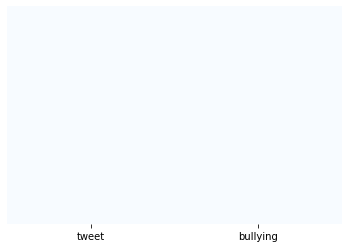

In [370]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'bullying'}>]], dtype=object)

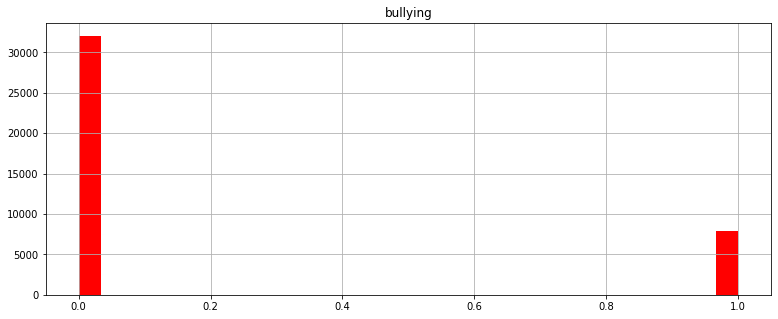

In [371]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

/home/pc/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bullying', ylabel='count'>

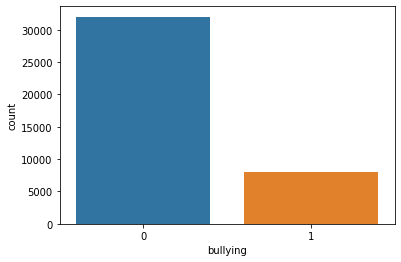

In [372]:
sns.countplot(tweets_df['bullying'], label = "Count") 

In [373]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [374]:
tweets_df

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
...                                                  ...       ...     ...
39995  see another university texas related source sg...         0     332
39996                      beautiful fairy elegant dress         0      29
39997  islam fastest growing religion world love dumb...         1      58
39998  since free transcribed see hope capturing must...         0    1314
39999  advocacy nuclear terrorism please call users a...         0     151

[39983 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

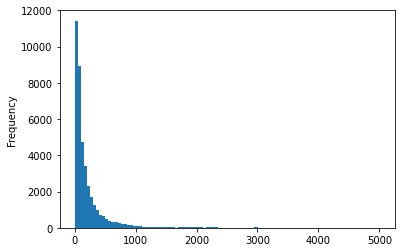

In [375]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [376]:
tweets_df.describe()

bullying        length
count  39983.000000  39983.000000
mean       0.198935    215.815297
std        0.399204    357.977279
min        0.000000      2.000000
25%        0.000000     46.000000
50%        0.000000     99.000000
75%        0.000000    232.000000
max        1.000000   5000.000000

In [377]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == min(tweets_df['length'])]['tweet'].iloc[0]

'go'

In [378]:
tweets_df[tweets_df['length'] == tweets_df[['length']].mean(axis=1)]['tweet'].iloc[0]

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas'

In [379]:
positive = tweets_df[tweets_df['bullying']==0]

In [380]:
positive

tweet  bullying  length
3       better atabay helping banned vandals pushing pov         0      48
4      camelcase sicko camelcase camelcase rule r bal...         0      70
5      hi requested arbitration wikipedia requests ar...         0     231
6      nonetheless lactose hemiacetal group e g sucro...         0      73
7      revert much want never say permission attack l...         0      52
...                                                  ...       ...     ...
39994  decline error block id found may unblocked alr...         0      50
39995  see another university texas related source sg...         0     332
39996                      beautiful fairy elegant dress         0      29
39998  since free transcribed see hope capturing must...         0    1314
39999  advocacy nuclear terrorism please call users a...         0     151

[32029 rows x 3 columns]

In [381]:
negative = tweets_df[tweets_df['bullying']==1]

In [382]:
negative

tweet  bullying  length
1      anti greek nationalis wikipedia hi alexikoua y...         1     233
2               dis hoe wasnt dis violent lottery ticket         1      40
8                       yo bag gucci still ugly hoe shut         1      32
21     love family even need water pop red pill hoe g...         1      66
23                  kitten dose look like bastard fucker         1      36
...                                                  ...       ...     ...
39984                                       faggot agree         1      12
39985         jose fucking mean like damn bitch lol fuck         1      42
39987  never understood whole pissin bitch trend goin...         1      78
39993                                         dumb bitch         1      10
39997  islam fastest growing religion world love dumb...         1      58

[7954 rows x 3 columns]

# TASK #4: PLOT THE WORDCLOUD

In [383]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

39983

In [384]:
sentences_as_one_string =" ".join(sentences)

In [385]:
sentences_as_one_string

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas dis hoe wasnt dis violent lottery ticket better atabay helping banned vandals pushing pov camelcase sicko camelcase camelcase rule r baley mentions inapplicable hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc nonetheless lactose hemiacetal group e g sucrose trehalose locked acetals revert much want never say permission attack lebanon yo bag gucci still ugly hoe shut thanks would used ping thanks include sentiments appreciate time took add much appreciated talk please testing sandbox thanks jul utc scott fivelson hello believe made considerable progress adding credibility sco

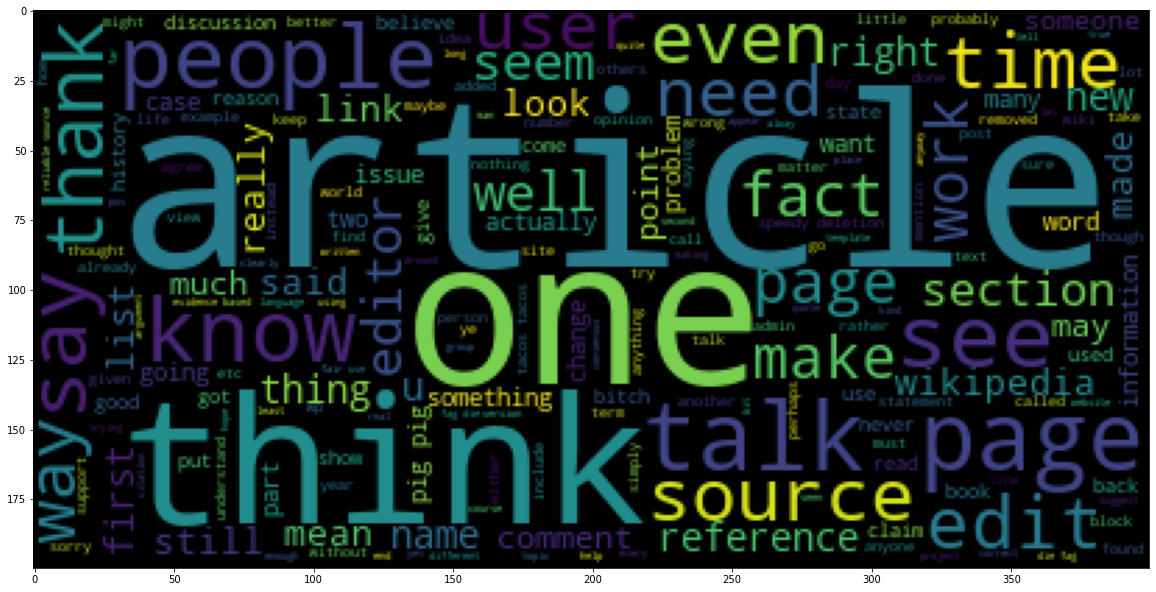

In [386]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

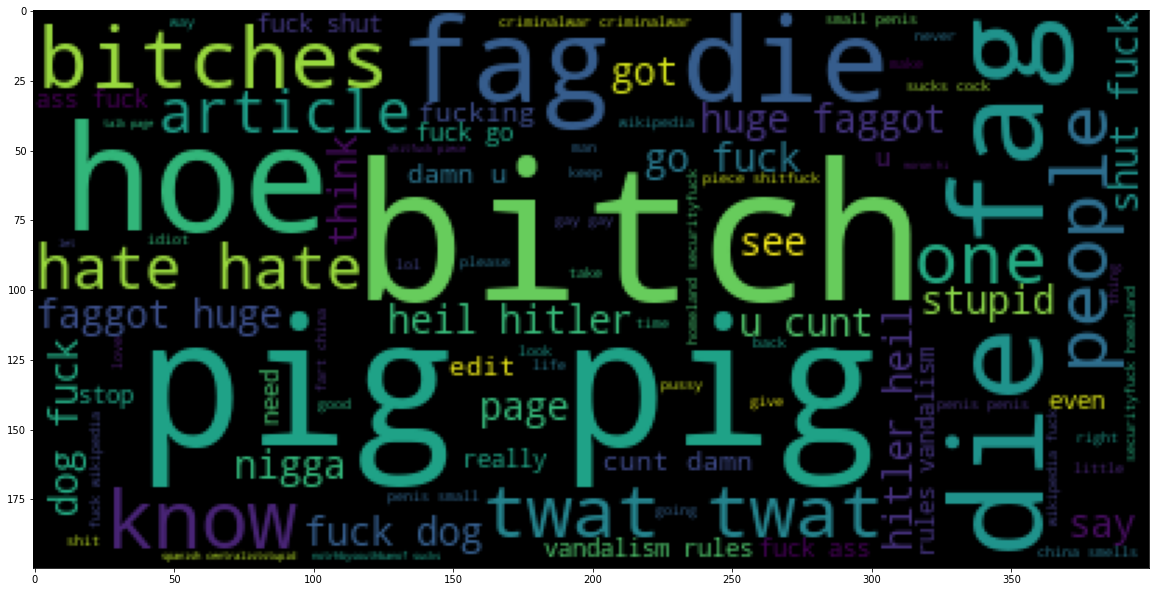

In [387]:
neg = negative['tweet'].tolist()
negsentence = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negsentence))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [388]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [389]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [390]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [391]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [392]:
import nltk
import ssl

In [393]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [394]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [395]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [396]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [397]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [398]:

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [399]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [400]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# TASK #8: CHANGE MADE HERE, CORRECT EVERYWHERE

In [401]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import re
from nltk.stem import WordNetLemmatizer

def message_cleaning(message):
    message = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split())
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in Test_punc_removed_join_clean]
    str1 = " "
    return str1.join(lemma_list)

cleaned_tweets = tweets_df['tweet'].apply(message_cleaning)
print(cleaned_tweets)

1        anti greek nationalis wikipedia hi alexikoua y...
2                 dis hoe wasnt dis violent lottery ticket
3          better atabay helping banned vandal pushing pov
4        camelcase sicko camelcase camelcase rule r bal...
5        hi requested arbitration wikipedia request arb...
                               ...                        
39995    see another university texas related source sg...
39996                        beautiful fairy elegant dress
39997    islam fastest growing religion world love dumb...
39998    since free transcribed see hope capturing must...
39999    advocacy nuclear terrorism please call user ad...
Name: tweet, Length: 39983, dtype: object


In [402]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
func_countvectorizer = CountVectorizer(min_df=5,dtype = 'uint8')
tweets_countvectorizer = func_countvectorizer.fit_transform(cleaned_tweets).toarray()


In [403]:
#print(tweets_df.get_feature_names())


In [404]:
print(tweets_countvectorizer)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [405]:
tweets_countvectorizer.shape

(39983, 12940)

In [406]:
tweets = pd.DataFrame(tweets_countvectorizer)
# 'zzzzzzzz'

In [407]:
# tweets = tweets_countvectorizer.toarray()

In [408]:
X = tweets_countvectorizer

In [409]:
y = tweets_df['bullying']

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [410]:
X.shape

(39983, 12940)

In [411]:
y.shape

(39983,)

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_countvectorizer, tweets_df['bullying'], test_size=0.2,random_state=10)

In [413]:
#del X

In [414]:
#del y 

In [415]:
X_train.dtype

dtype('uint8')

In [416]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
filename = 'NBBowTrained.sav'

with open(filename, 'wb') as fout:
    pickle.dump((NB_classifier, func_countvectorizer), fout)

MemoryError: Unable to allocate 3.08 GiB for an array with shape (31986, 12940) and data type int64

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))